In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf

## Oefening 1

Pas aan de hand van een Smith kaart om een antenne van 128 Ohm aan aan een striplijn printbaan van 50 Ohm voor een frequentie van 1.2 GHz ($\lambda$= 12.5 cm; $\epsilon_r$=4).Doe dit door een condensator in parallel op de 50 Ohm lijn te plaatsen. Waar moet deze condensator staan en hoe groot moet deze zijn? Wanneer 250 mW naar deze antenne gestuurd wordt, hoe groot is dan de maximale spanning aan de voet van de antenne? Hoe groot is de maximale spanning op de plaats waar de condensator is aangesloten?


### deel A: Bijplaatsen van een capaciteit in parallel

We plaatsen $\frac{Z_L}{Z_0}=2.56$ op de Smith kaart en we zoeken waar we de y=1 cirkel snijden in het bovenste deel van de kaart.

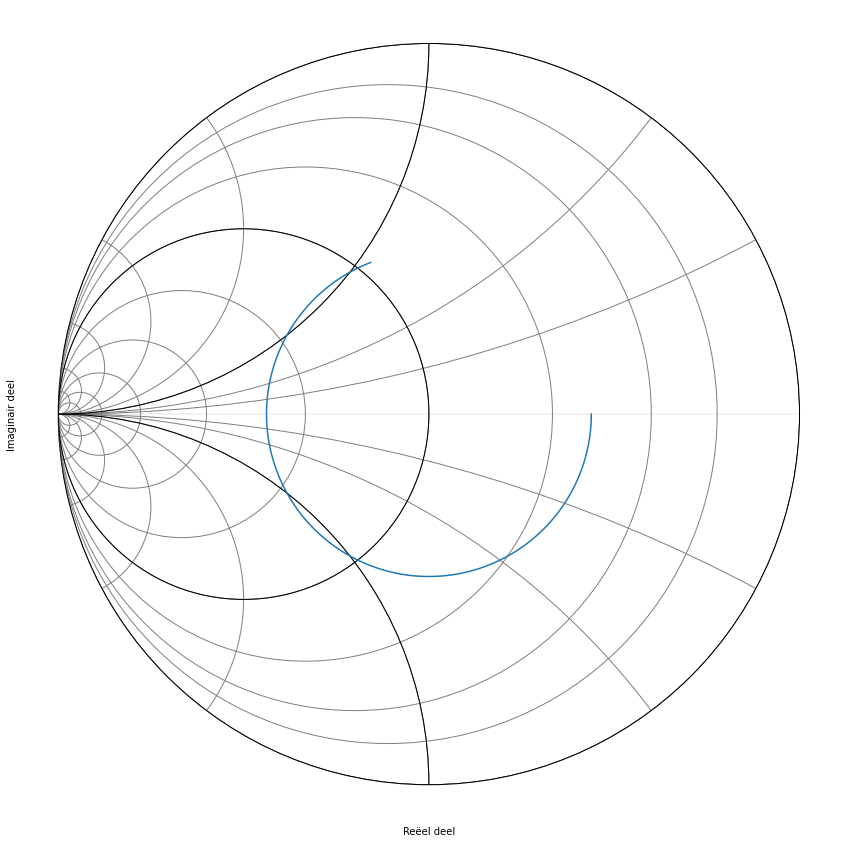

In [4]:
Z_L = 128
Z_0 = 50
f_0_str = '1.2GHz'
freq = rf.Frequency(start=1.1, stop=1.3, npoints=51, unit='GHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,250)]
gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma , chart_type='y',x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

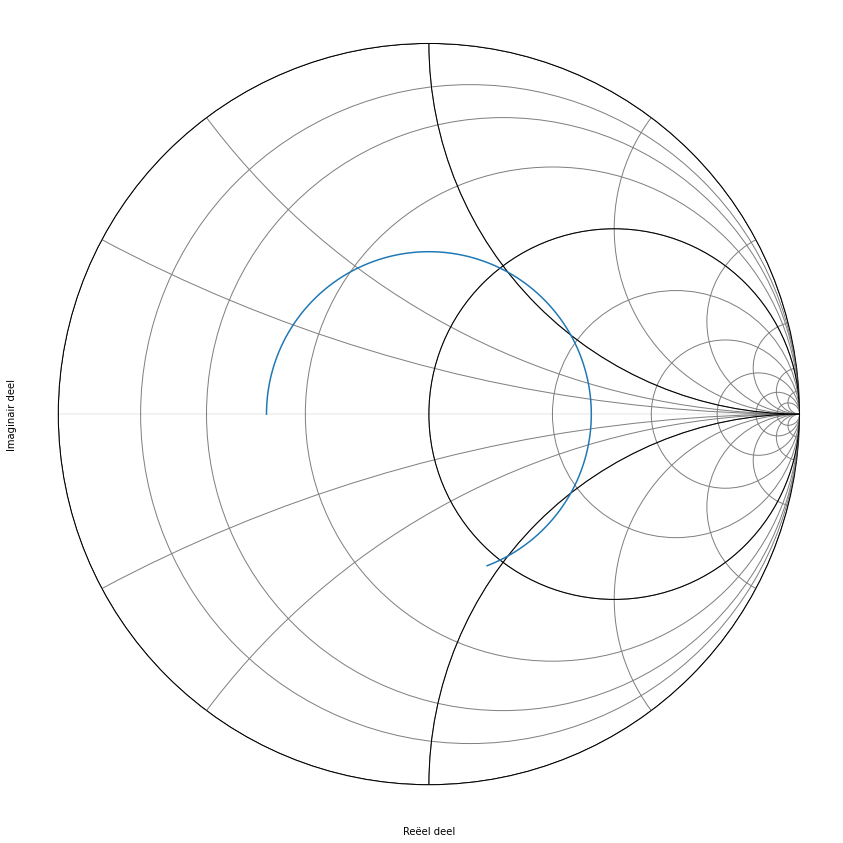

In [5]:
Z_L = 128
Z_0 = 50
f_0_str = '1.2GHz'
freq = rf.Frequency(start=1.1, stop=1.3, npoints=51, unit='GHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,250)]
gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma , x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

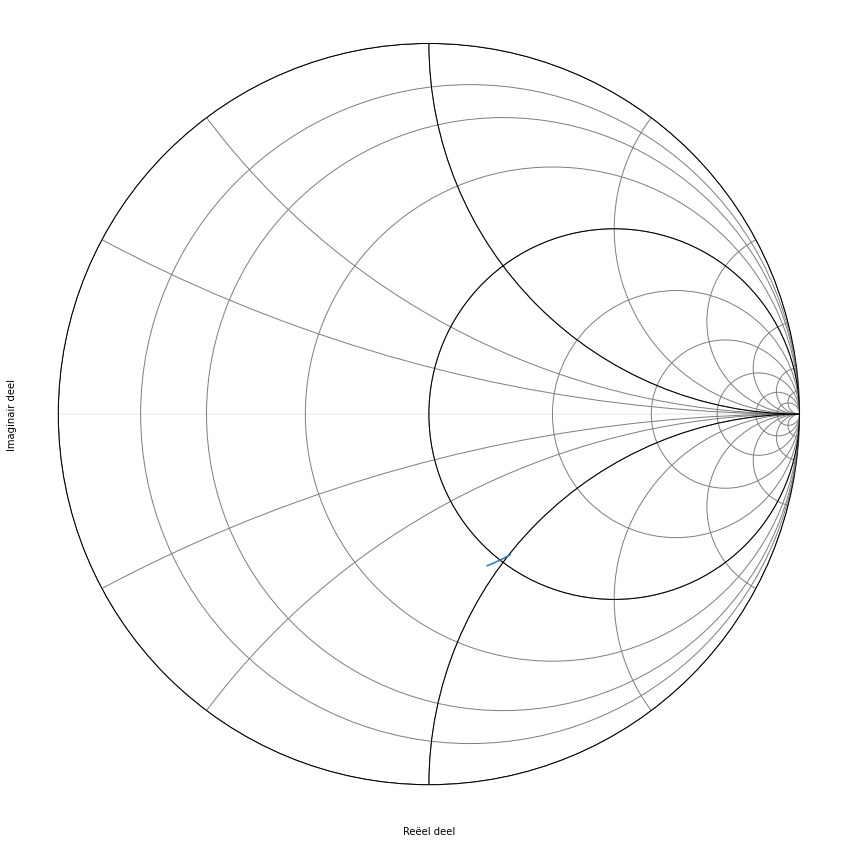

In [7]:
Z_L = 128
Z_0 = 50
f_0_str = '1.2GHz'
freq = rf.Frequency(start=1.1, stop=1.3, npoints=51, unit='GHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(240,250)]
gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma , x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

In [8]:
ylijn

[(0.021436945235303984-0.020137157437854884j),
 (0.02106492540114965-0.01998406435336276j),
 (0.0207021643286975-0.019826922720252528j),
 (0.020348474134860912-0.01966606036465809j),
 (0.02000366473704741-0.019501786133142164j),
 (0.019667544659009908-0.019334390765567786j),
 (0.019339921750726585-0.019164147750174682j),
 (0.019020603829182508-0.01899131415787018j),
 (0.01870939924654561-0.018816131453360203j),
 (0.01840611739184614-0.01863882628128443j)]

In [9]:
0.019501786133142164/2/np.pi/1.2e9

2.5865047185087957e-12

In [10]:
244/360*12.5/2

4.236111111111112


$$\frac{244}{360}\frac{\lambda}{2}= \frac{244}{360}\frac{12.5}{2}= 4.24 cm$$


<div class="alert alert-success">
De optimale condensatorwaarde in parallel wordt dus  2.59 pF en de lengte van de transmissielijn tussen de antenne en deze capaciteit is gelijk aan 4.24 cm
<\div>

<div class="alert alert-warning">
Toe te voegen: een schema van het uitendelijk aangepaste circuit
<\div>

### deel B: Spanning aan de voet van de antenne

Aangezien we een perfecte aanpassing hebben uitgevoerd, wordt het volledige vermogen dat op de kabel gestuurd wordt ook bekomen op de antenne. Derhalve kunnen we schrijven:

$$ P_{in}= \frac{V_L^2}{2 R_L}  $$

Waarbij $P_{in}$ het vermogen is dat naar de antenne gestuurd wordt (250 mW), $V_L$ de amplitude van de spanning op de antenne en $R_L$ de impedantie van de antenne, i.e. 128$\Omega$. 
Hieruit volgt dat de amplitude van de spanning die op de antenne bekomen wordt gelijk is aan 8 V.

In [11]:
np.sqrt(2*128*0.25)

8.0

### deel C: Maximale spanning op het gedeelte van de kabel voor de aansluiting van de condensator 

De spanningsamplitude $V_a$ op de kabel kunnen we afleiden uit he vermogen en de karakteristieke impedantie $Z_o$:

$$ P_{in}= \frac{V_a^2}{2 Z_o}  $$

Hieruit volgt dat de amplitude op de kabel gelijk is aan 5 V.

In [12]:
np.sqrt(2*50*0.25)

5.0

<div class="alert alert-success">
Dit laat ons toe vast te stellen dat de spanningsamplitude als gevolg van de aanpassing gaat stijgen van 5 V (normaal op de lijn) naar 8V ter hoogte van de aanpassing.
Het omgekeerde gebeurt echter met de stroomamplitude: deze daalt van 100 mA op de lijn, naar 62,5 mA in de antenne.
<\div>

In [13]:
8/128

0.0625